# Data Pre-Processing and preparation

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [88]:
df=pd.read_csv("munnar.csv")
print(df.columns)

Index(['Hotel Name\t\t\t\t\t\t\t\t\t', 'Rating', 'Rating Description',
       'Reviews', 'Star Rating', 'Location', 'Nearest Landmark',
       'Distance to Landmark', 'Price', 'Tax'],
      dtype='object')


In [89]:
df.rename(columns={'Hotel Name\t\t\t\t\t\t\t\t\t' : 'Hotel Name'}, inplace=True)
print(df.head())

          Hotel Name  Rating Rating Description  Reviews  Star Rating  \
0       Gokulam Park     4.1          Very Good     1058          4.0   
1    Sterling Munnar     3.8          Very Good     1088          4.0   
2   Issacs Residency     4.1          Very Good      322          3.0   
3  Tea Valley Resort     4.3          Excellent     1337          4.0   
4        Grand Plaza     4.3          Excellent     1058          4.0   

          Location    Nearest Landmark Distance to Landmark  Price  Tax  
0   Chithirapuram          city centre             10.2 km   2,728  574  
1     Chinnakanal          city centre             19.2 km   4,451  969  
2  Central Munnar   Attukal Waterfalls               950 m   2,758  684  
3      Pallivasal          city centre              4.8 km   2,675  756  
4      Moolakadai   Attukal Waterfalls              1.9 km   3,203  654  


In [90]:
df.index=df['Hotel Name']

In [91]:
print(df.loc['Grand Plaza'])
print("________________________")
print(df.iloc[2])

Hotel Name                     Grand Plaza
Rating                                 4.3
Rating Description               Excellent
Reviews                               1058
Star Rating                            4.0
Location                       Moolakadai 
Nearest Landmark        Attukal Waterfalls
Distance to Landmark               1.9 km 
Price                                3,203
Tax                                    654
Name: Grand Plaza, dtype: object
________________________
Hotel Name                Issacs Residency
Rating                                 4.1
Rating Description               Very Good
Reviews                                322
Star Rating                            3.0
Location                   Central Munnar 
Nearest Landmark        Attukal Waterfalls
Distance to Landmark                950 m 
Price                                2,758
Tax                                    684
Name: Issacs Residency, dtype: object


In [92]:
df.nunique()

,0
Hotel Name,74
Rating,18
Rating Description,4
Reviews,70
Star Rating,4
Location,22
Nearest Landmark,2
Distance to Landmark,57
Price,72
Tax,70


In [93]:
df["Tax"] = df["Tax"].str.replace(",", "")
df["Tax"] = df["Tax"].astype(float)

In [94]:
df["Price"]=df["Price"].str.replace(",","")
df["Price"]=df["Price"].astype(float)

In [95]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, Gokulam Park to Lumino Highrange Homestay | Room & Guided Treks
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           57 non-null     float64
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     object 
 8   Price                 74 non-null     float64
 9   Tax                   72 non-null     float64
dtypes: float64(4), int64(1), object(5)
memory usage: 8.4+ KB
None


In [96]:
# pd.set_option('display.max_rows',None)
# print(df["Distance to Landmark"])

In [97]:
#converting the distance values from from obejct to float and eliminating the units.
def convert_distance(distance):
  if ' m' in distance:
    distance=(distance.replace(' m',''))
    distance=float(distance)*0.001
    return distance
  elif 'km' in distance:
    distance=distance.replace(' km','')
    return distance
  else:
    return distance

df['Distance to Landmark'] = df['Distance to Landmark'].apply(convert_distance)

df['Distance to Landmark']=df['Distance to Landmark'].astype(float)

pd.set_option('display.max_rows',None)
print(df["Distance to Landmark"])

Hotel Name
Gokulam Park                                                 10.20
Sterling Munnar                                              19.20
Issacs Residency                                              0.95
Tea Valley Resort                                             4.80
Grand Plaza                                                   1.90
Misty Mountain Resort                                         7.50
Eastend Munnar                                                0.77
Seven Springs Plantation Resort                              12.30
Clouds Valley Leisure Hotel                                   2.20
Broad Bean Resort & Spa                                      13.10
KTDC Tea County                                               1.70
Parakkat Nature Resorts                                       7.80
Chithirapuram Palace | Rooms & Restaurant\nLike a 3          10.80
Devonshire Greens - The Leisure Hotel & Spa                   5.90
Sn Holiday Home                                    

In [98]:
#filling null values with mode values for star rating
most_frequent_star_rating = df['Star Rating'].mode()[0]
df['Star Rating'].fillna(most_frequent_star_rating, inplace=True)

In [99]:
#filling null values with median values for tax
median_tax = df['Tax'].median()
df['Tax'].fillna(median_tax, inplace=True)

In [100]:
df['Hotel Name']=df['Hotel Name'].str.replace("\n","")
df['Star Rating']=df['Star Rating'].astype('int8')

In [101]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, Gokulam Park to Lumino Highrange Homestay | Room & Guided Treks
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            74 non-null     object 
 1   Rating                74 non-null     float64
 2   Rating Description    74 non-null     object 
 3   Reviews               74 non-null     int64  
 4   Star Rating           74 non-null     int8   
 5   Location              74 non-null     object 
 6   Nearest Landmark      74 non-null     object 
 7   Distance to Landmark  74 non-null     float64
 8   Price                 74 non-null     float64
 9   Tax                   74 non-null     float64
dtypes: float64(4), int64(1), int8(1), object(4)
memory usage: 7.9+ KB
None


# Data Visualization

In [102]:
df.style.background_gradient(cmap='Reds')

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
Hotel Name,,,,,,,,,,
Gokulam Park,Gokulam Park,4.100000,Very Good,1058,4,Chithirapuram,city centre,10.200000,2728.000000,574.000000
Sterling Munnar,Sterling Munnar,3.800000,Very Good,1088,4,Chinnakanal,city centre,19.200000,4451.000000,969.000000
Issacs Residency,Issacs Residency,4.100000,Very Good,322,3,Central Munnar,Attukal Waterfalls,0.950000,2758.000000,684.000000
Tea Valley Resort,Tea Valley Resort,4.300000,Excellent,1337,4,Pallivasal,city centre,4.800000,2675.000000,756.000000
Grand Plaza,Grand Plaza,4.300000,Excellent,1058,4,Moolakadai,Attukal Waterfalls,1.900000,3203.000000,654.000000
Misty Mountain Resort,Misty Mountain Resort,4.200000,Very Good,1934,4,Pallivasal,city centre,7.500000,3145.000000,848.000000
Eastend Munnar,Eastend Munnar,3.900000,Very Good,437,4,Central Munnar,Attukal Waterfalls,0.770000,3493.000000,713.000000
Seven Springs Plantation Resort,Seven Springs Plantation Resort,3.700000,Very Good,6,3,Laxmi Estate,city centre,12.300000,2255.000000,554.000000
Clouds Valley Leisure Hotel,Clouds Valley Leisure Hotel,4.000000,Very Good,599,4,Near Munnar Bus Stand,Attukal Waterfalls,2.200000,2595.000000,530.000000


<Figure size 640x480 with 0 Axes>

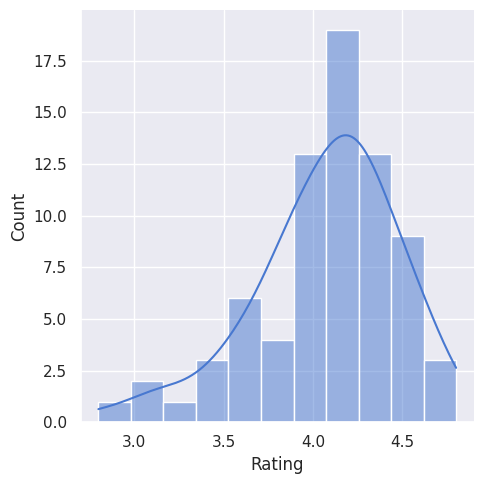

<Figure size 640x480 with 0 Axes>

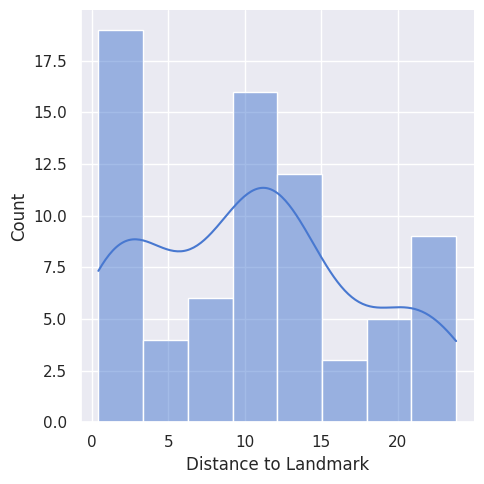

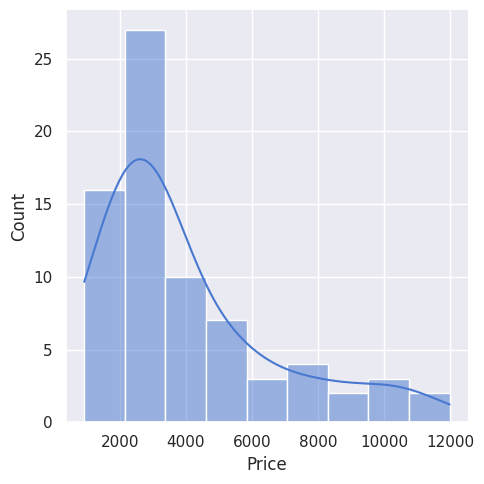

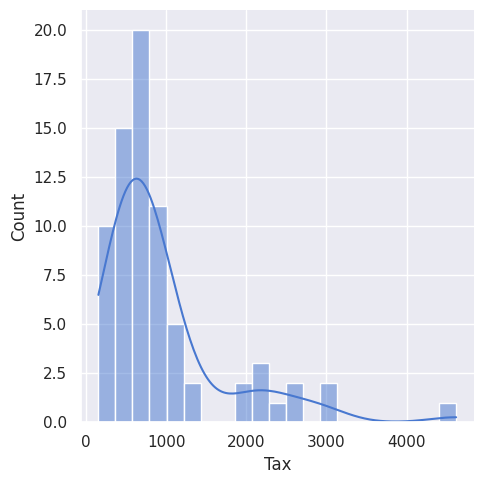

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns


#distribution plot for every column in the dataframe

for i, col in enumerate(df.columns):
  if df[col].dtype=='float':
    plt.figure(i)
    sns.displot(df[col], kde=True)

<Axes: xlabel='Rating Description'>

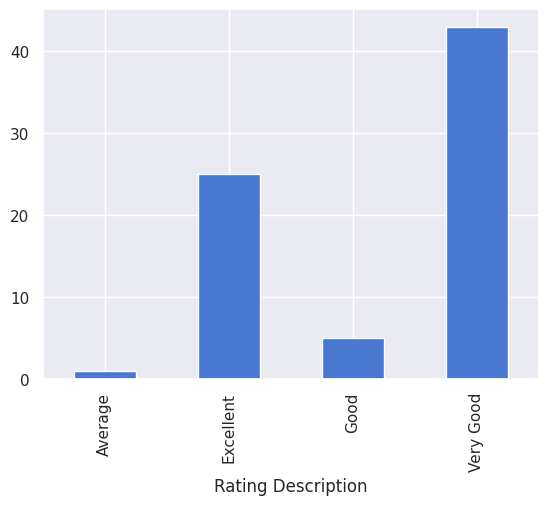

In [104]:
#plot a barplot for "Rating Description" using groupby
df.groupby('Rating Description').size().plot(kind='bar')

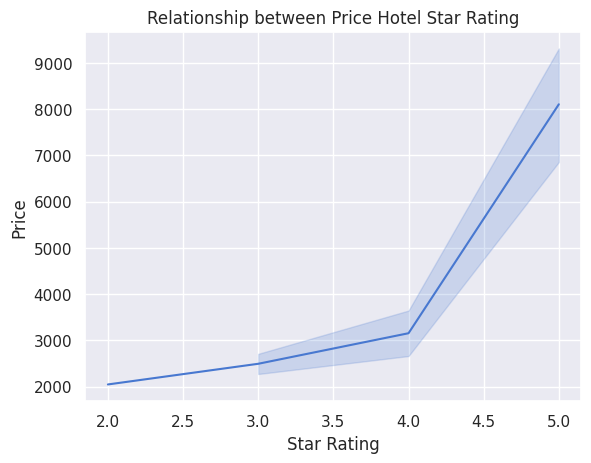

In [105]:
sns.lineplot(x='Star Rating', y='Price', data=df)
plt.title('Relationship between Price Hotel Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Price')
plt.show()

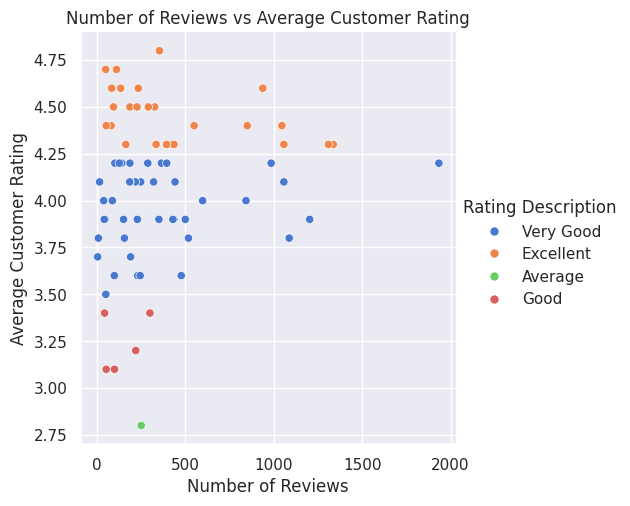

In [106]:
sns.relplot(x='Reviews',y='Rating',kind='scatter',data=df,hue='Rating Description')
plt.title('Number of Reviews vs Average Customer Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Customer Rating')
plt.show()

<Axes: ylabel='count'>

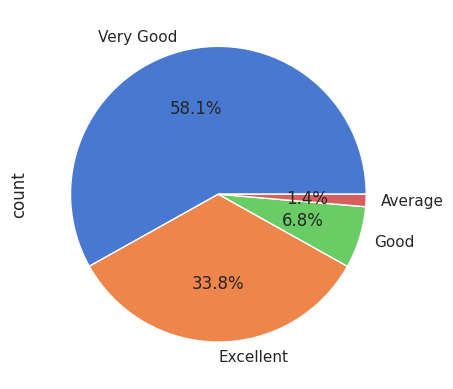

In [107]:
df['Rating Description'].value_counts().plot(kind='pie', autopct='%1.1f%%')